In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist import grid_finder
from mpl_toolkits.axisartist import floating_axes
import cartopy.crs as ccrs

In [2]:
import os
import sys
from pathlib import Path
SCRIPT_DIR = os.path.dirname(os.path.abspath("__init__.py"))
SRC_DIR = Path(SCRIPT_DIR).parent.parent.absolute()
print(SCRIPT_DIR)
print(SRC_DIR)
sys.path.append(os.path.dirname(SRC_DIR))

/Users/yannis/PycharmProjects/WeRec3D/src/validation_on_test_set
/Users/yannis/PycharmProjects/WeRec3D


In [10]:
from src.experiments_evaluation.validation_helpers import scale_t2m_back, scale_slp_back
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [33]:
MONTHS = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
dates_val = pd.date_range(start="1955-01-01", periods=3644, freq="D")
dates_test = pd.date_range(start="1950-01-01", periods=1820, freq="D")

## Load errors

### Validation

In [5]:
temp_ta_val = scale_t2m_back(np.load("../experiments_evaluation/ex5.1_elev_mov_cmi/errors/temp_t2m_err_99p.npy"), 
                         for_error=True)
temp_slp_val = scale_slp_back(np.load("../experiments_evaluation/ex5.1_elev_mov_cmi/errors/temp_slp_err_99p.npy"),
                              for_error=True)
print(temp_ta_val.shape)
print(temp_slp_val.shape)

spat_ta_val = scale_t2m_back(np.load("../experiments_evaluation/ex5.1_elev_mov_cmi/errors/spat_t2m_err_99p.npy"), 
                         for_error=True)
spat_slp_val = scale_slp_back(np.load("../experiments_evaluation/ex5.1_elev_mov_cmi/errors/spat_slp_err_99p.npy"),
                              for_error=True)
print(spat_ta_val.shape)
print(spat_slp_val.shape)

(3644,)
(3644,)
(32, 64)
(32, 64)


## Test

In [13]:
temp_ta_test = scale_t2m_back(np.load("outputs/temp_t2m_err_99p.npy"), 
                         for_error=True)
temp_slp_test = scale_slp_back(np.load("outputs/temp_slp_err_99p.npy"),
                              for_error=True)
print(temp_ta_test.shape)
print(temp_slp_test.shape)

spat_ta_test = scale_t2m_back(np.load("outputs/spat_t2m_err_99p.npy"), 
                         for_error=True)
spat_slp_test = scale_slp_back(np.load("outputs/spat_slp_err_99p.npy"),
                              for_error=True)
print(spat_ta_test.shape)
print(spat_slp_test.shape)

(1820,)
(1820,)
(32, 64)
(32, 64)


## Temporal Boxplot Preparation

In [16]:
df_temporal_val = pd.DataFrame({
    "err_ta": temp_ta_val,
    "err_slp": temp_slp_val,
    "month": dates_val.month
})
df_temporal_test = pd.DataFrame({
    "err_ta": temp_ta_test,
    "err_slp": temp_slp_test,
    "month": dates_test.month
})

# Overall Plot

Text(0.5, 0.98, '')

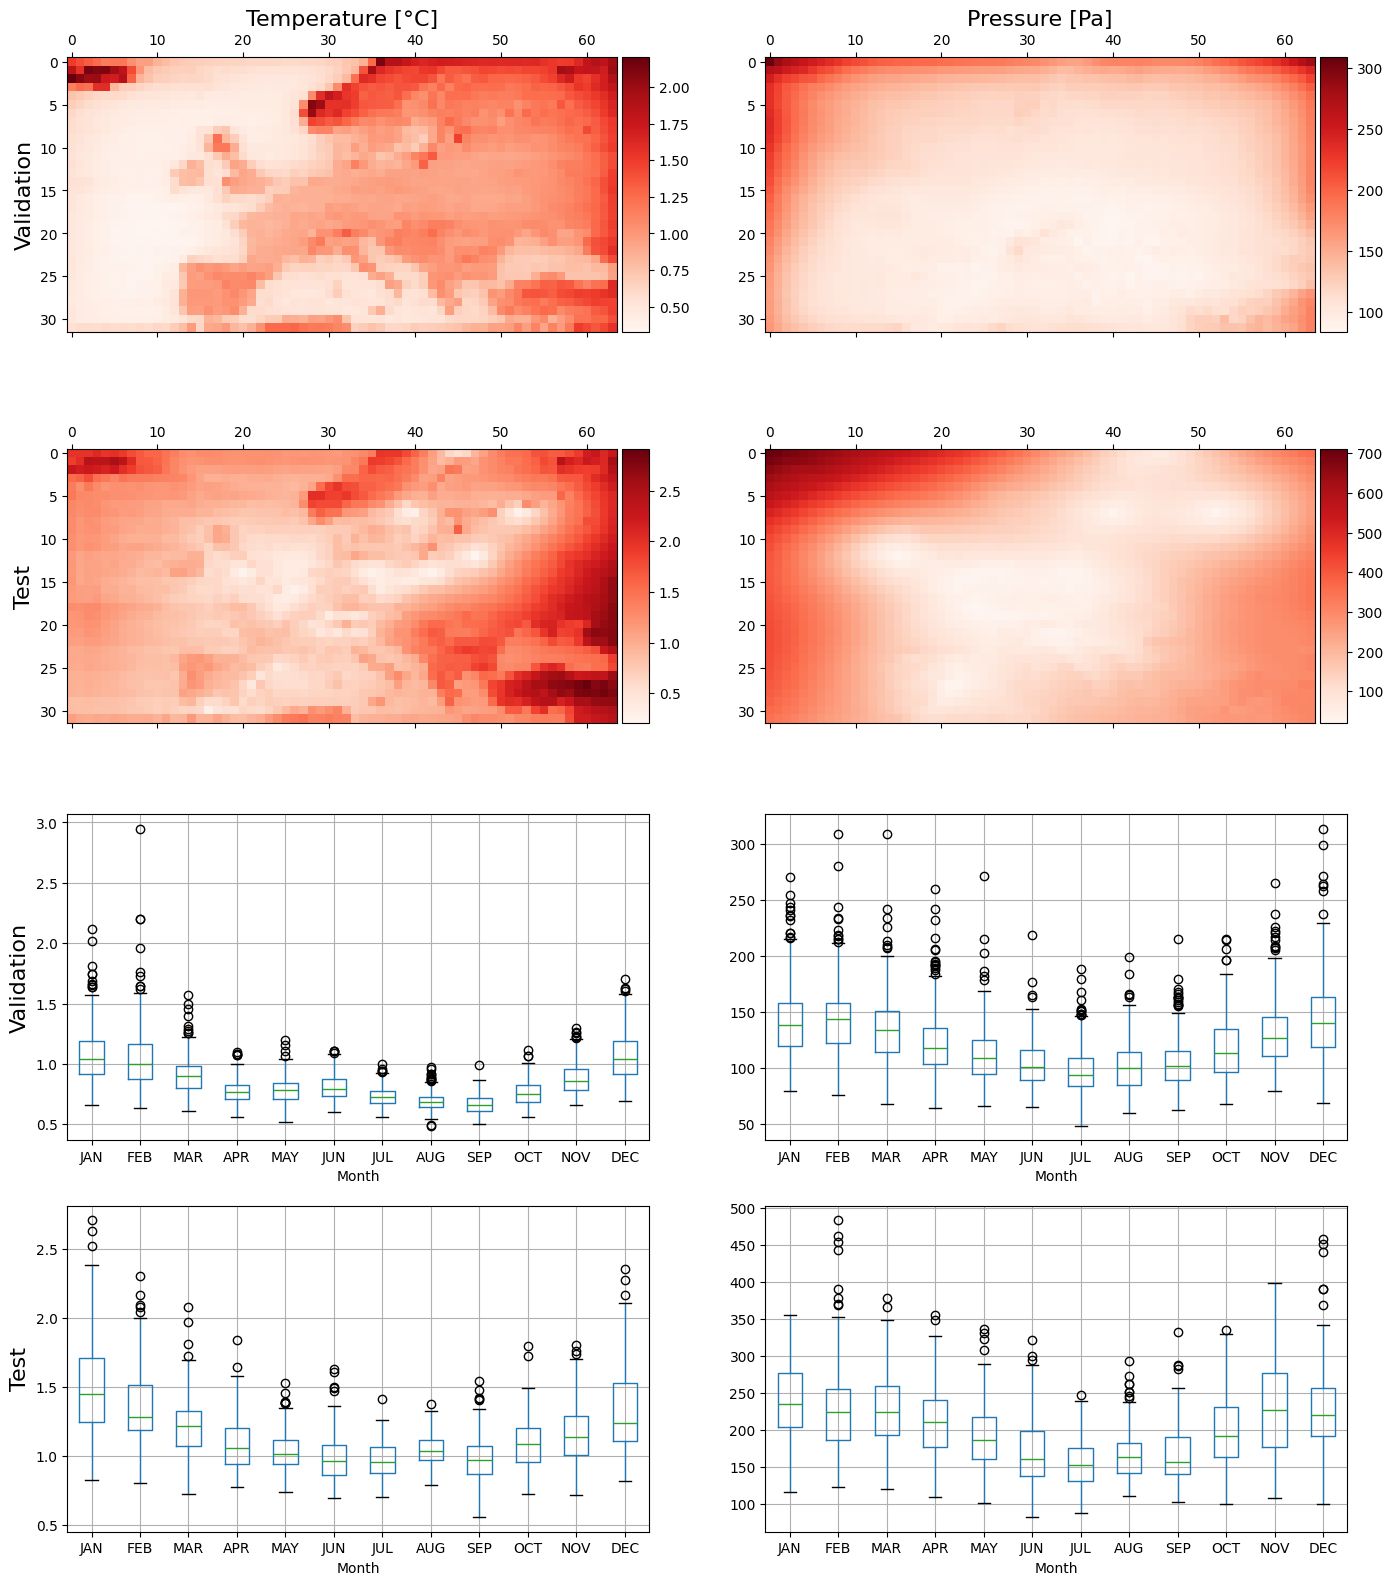

In [39]:
"""
ta_spat_min = np.minimum(np.min(spat_ta_val), np.min(spat_ta_test))
ta_spat_max = np.maximum(np.max(spat_ta_val), np.max(spat_ta_test))
ta_temp_min = np.minimum(np.min(temp_ta_val), np.min(temp_ta_test))
ta_temp_max = np.maximum(np.max(temp_ta_val), np.max(temp_ta_test))

slp_spat_min = np.minimum(np.min(spat_slp_val), np.min(spat_slp_test))
slp_spat_max = np.maximum(np.max(spat_slp_val), np.max(spat_slp_test))
slp_temp_min = np.minimum(np.min(temp_slp_val), np.min(temp_slp_test))
slp_temp_max = np.maximum(np.max(temp_slp_val), np.max(temp_slp_test))
"""

fig, axes = plt.subplots(4, 2, figsize=(16, 20))

# SPATIAL
# Validation Temperature
ax00 = axes[0,0]
im00 = ax00.matshow(spat_ta_val, cmap='Reds') #, vmin=ta_spat_min, vmax=ta_spat_max)
divider00 = make_axes_locatable(ax00)
cax00 = divider00.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im00, cax=cax00)
ax00.set_title(f"Temperature [°C]", fontsize=16)

# Validation Pressure
ax01 = axes[0,1]
# ax01 = plt.subplot(121, projection=ccrs.PlateCarree())
im01 = ax01.matshow(spat_slp_val, cmap='Reds') #, vmin=slp_spat_min, vmax=slp_spat_max)
divider01 = make_axes_locatable(ax01)
cax01 = divider01.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im01, cax=cax01)
ax01.set_title(f"Pressure [Pa]", fontsize=16)


# Test Temperature
ax10 = axes[1,0]
im10 = ax10.matshow(spat_ta_test, cmap='Reds') #, vmin=ta_spat_min, vmax=ta_spat_max)
divider10 = make_axes_locatable(ax10)
cax10 = divider10.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im10, cax=cax10)
# ax10.set_title(f"ta [°C]", fontsize=16)

# Test Pressure
ax11 = axes[1,1]
im11 = ax11.matshow(spat_slp_test, cmap='Reds') #, vmin=slp_spat_min, vmax=slp_spat_max)
divider11 = make_axes_locatable(ax11)
cax11 = divider11.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im11, cax=cax11)
# ax01.set_title(f"slp [PA]", fontsize=16)

# BOX PLOTS
# Validation Temperature
ax20 = axes[2,0]
df_temporal_val.boxplot(column=['err_ta'], by='month', ax=ax20)
ax20.set(xlabel='Month') # , ylabel='TA Error [°C]')
ax20.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax20.set_title("")

# Validation Pressure
ax21 = axes[2,1]
df_temporal_val.boxplot(column=['err_slp'], by='month', ax=ax21)
ax21.set(xlabel='Month') # , ylabel='TA Error [°C]')
ax21.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax21.set_title("")

# TEST Temperature
ax30 = axes[3,0]
df_temporal_test.boxplot(column=['err_ta'], by='month', ax=ax30)
ax30.set(xlabel='Month') # , ylabel='TA Error [°C]')
ax30.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax30.set_title("")

# Validation Pressure
ax31 = axes[3,1]
df_temporal_test.boxplot(column=['err_slp'], by='month', ax=ax31)
ax31.set(xlabel='Month') # , ylabel='TA Error [°C]')
ax31.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax31.set_title("")


ax00.set_ylabel(f"Validation", fontsize=16)
ax10.set_ylabel(f"Test", fontsize=16)
ax20.set_ylabel(f"Validation", fontsize=16)
ax30.set_ylabel(f"Test", fontsize=16)

plt.title('')
plt.suptitle('')

Text(0.5, 1.0, 'Pressure [Pa]')

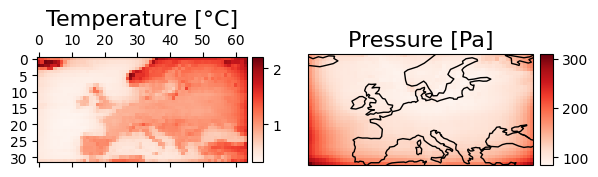

In [74]:
# Define reduced size window
BASE_LAT_START = 67
BASE_LAT_END = 36  # Considered exclusive
BASE_LON_START = -22
BASE_LON_END = 41  # Considered exclusive

extent = [BASE_LON_START, BASE_LON_END, BASE_LAT_START,  BASE_LAT_END]

# Create a figure and a grid of subplots
fig = plt.figure()

# SPATIAL
ax00 = fig.add_subplot(2, 2, 1)
im00 = ax00.matshow(spat_ta_val, cmap='Reds') #, vmin=ta_spat_min, vmax=ta_spat_max)
divider00 = make_axes_locatable(ax00)
cax00 = divider00.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im00, cax=cax00)
ax00.set_title(f"Temperature [°C]", fontsize=16)


ax01 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax01.coastlines(resolution='110m')
ax01.set_extent(extent, ccrs.PlateCarree())#,
im01 = ax01.imshow(spat_slp_val, 
                 transform=ccrs.PlateCarree(),
                 extent=extent,
                 origin='upper',
                 interpolation='nearest',
                 cmap='Reds')

cax01 = fig.add_axes([ax01.get_position().x1 + 0.01, ax01.get_position().y0, 0.02, ax01.get_position().height])
plt.colorbar(im01, cax=cax01)

# ax01.axis('off') 
# divider01 = make_axes_locatable(ax01)
# cax01 = divider01.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(im01, cax=cax01)
ax01.set_title(f"Pressure [Pa]", fontsize=16)



Text(0.5, 0.98, '')

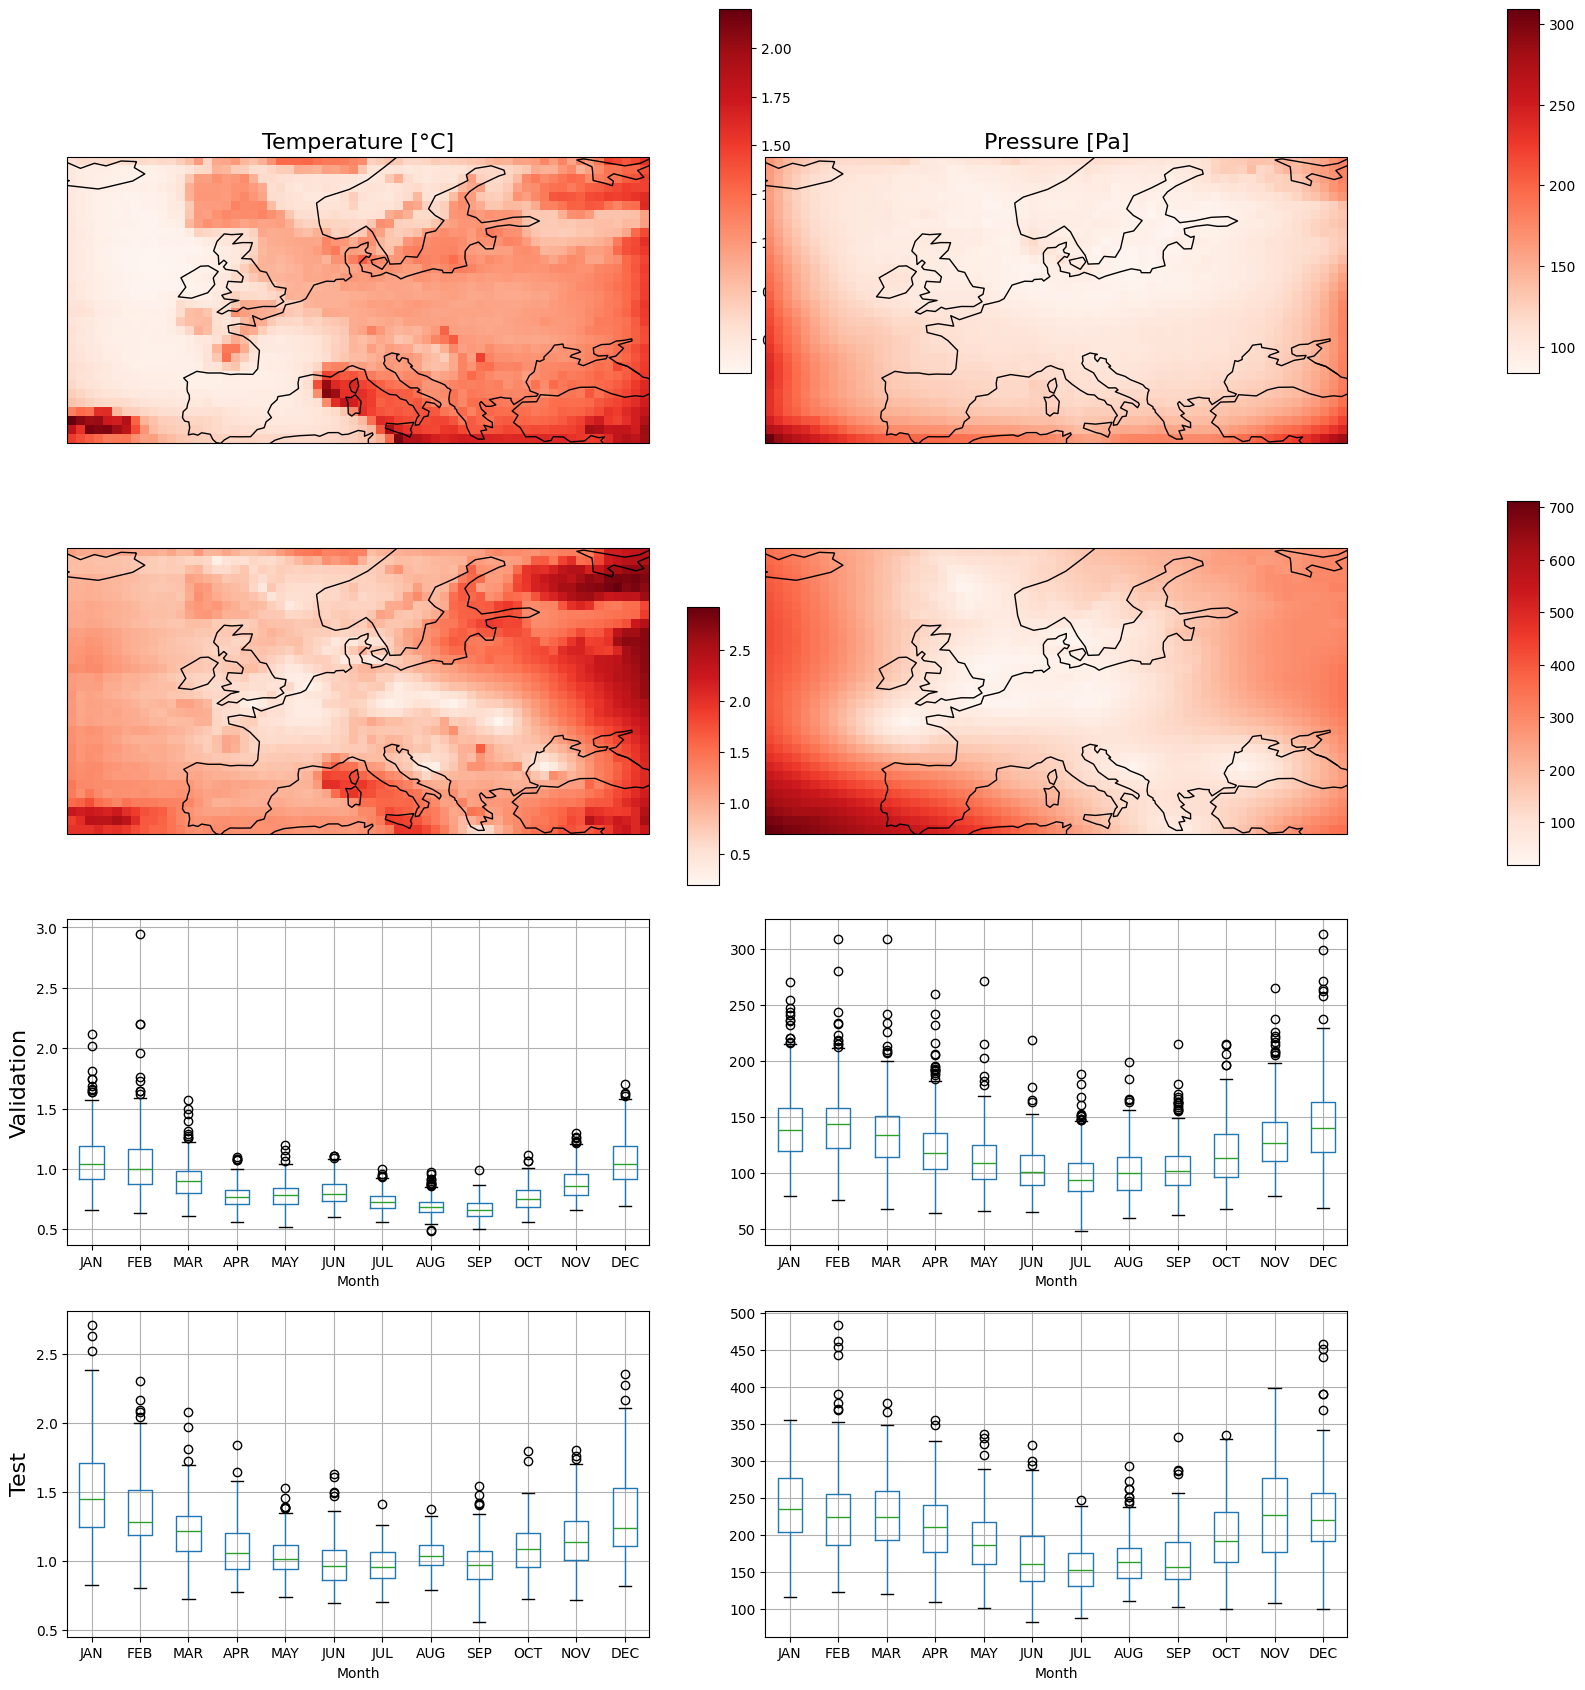

In [108]:
# Define reduced size window
BASE_LAT_START = 67
BASE_LAT_END = 36  # Considered exclusive
BASE_LON_START = -22
BASE_LON_END = 41  # Considered exclusive

extent = [BASE_LON_START, BASE_LON_END, BASE_LAT_START,  BASE_LAT_END]

# Create a figure and a grid of subplots
fig = plt.figure(figsize=(16, 20))

# SPATIAL
# Validation Temperature
ax00 = fig.add_subplot(4, 2, 1, projection=ccrs.PlateCarree())
ax00.coastlines(resolution='110m')
ax00.set_extent(extent, ccrs.PlateCarree())
im00 = ax00.imshow(spat_ta_val, 
                 transform=ccrs.PlateCarree(),
                 extent=extent,
                 origin='upper',
                 interpolation='nearest',
                 cmap='Reds')
cax00 = fig.add_axes([ax00.get_position().x1 + 0.03, 
                      ax00.get_position().y0 + 0.055, 
                      0.02, 
                      ax00.get_position().height + 0.043])
plt.colorbar(im00, cax=cax00)
ax00.set_title(f"Temperature [°C]", fontsize=16)

# Validation Pressure
ax01 = fig.add_subplot(4, 2, 2, projection=ccrs.PlateCarree())
ax01.coastlines(resolution='110m')
ax01.set_extent(extent, ccrs.PlateCarree())#,
im01 = ax01.imshow(spat_slp_val, 
                 transform=ccrs.PlateCarree(),
                 extent=extent,
                 origin='upper',
                 interpolation='nearest',
                 cmap='Reds')

cax01 = fig.add_axes([ax01.get_position().x1 + 0.1, 
                      ax01.get_position().y0 + 0.055, 
                      0.02,
                      ax01.get_position().height + 0.043])
plt.colorbar(im01, cax=cax01)
ax01.set_title(f"Pressure [Pa]", fontsize=16)

# Test Temperature
ax10 = fig.add_subplot(4, 2, 3, projection=ccrs.PlateCarree())
ax10.coastlines(resolution='110m')
ax10.set_extent(extent, ccrs.PlateCarree())
im10 = ax10.imshow(spat_ta_test, 
                 transform=ccrs.PlateCarree(),
                 extent=extent,
                 origin='upper',
                 interpolation='nearest',
                 cmap='Reds')
cax10 = fig.add_axes([ax10.get_position().x1 + 0.01, 
                      ax10.get_position().y0,
                      0.02, 
                      ax10.get_position().height])
plt.colorbar(im10, cax=cax10)

# Test Pressure
ax11 = fig.add_subplot(4, 2, 4, projection=ccrs.PlateCarree())
ax11.coastlines(resolution='110m')
ax11.set_extent(extent, ccrs.PlateCarree())
im11 = ax11.imshow(spat_slp_test, 
                 transform=ccrs.PlateCarree(),
                 extent=extent,
                 origin='upper',
                 interpolation='nearest',
                 cmap='Reds')
cax11 = fig.add_axes([ax11.get_position().x1 + 0.1, 
                      ax11.get_position().y0 + 0.01,
                      0.02, 
                      ax11.get_position().height + 0.043])
plt.colorbar(im11, cax=cax11)

# BOX PLOTS
# Validation Temperature
ax20 = fig.add_subplot(4, 2, 5)
df_temporal_val.boxplot(column=['err_ta'], by='month', ax=ax20)
ax20.set(xlabel='Month') # , ylabel='TA Error [°C]')
ax20.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax20.set_title("")

# Validation Pressure
ax21 = fig.add_subplot(4, 2, 6)
df_temporal_val.boxplot(column=['err_slp'], by='month', ax=ax21)
ax21.set(xlabel='Month') # , ylabel='TA Error [°C]')
ax21.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax21.set_title("")

# TEST Temperature
ax30 =fig.add_subplot(4, 2, 7)
df_temporal_test.boxplot(column=['err_ta'], by='month', ax=ax30)
ax30.set(xlabel='Month') # , ylabel='TA Error [°C]')
ax30.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax30.set_title("")

# Validation Pressure
ax31 = fig.add_subplot(4, 2, 8)
df_temporal_test.boxplot(column=['err_slp'], by='month', ax=ax31)
ax31.set(xlabel='Month') # , ylabel='TA Error [°C]')
ax31.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax31.set_title("")


ax00.set_ylabel(f"Validation", fontsize=16)
ax10.set_ylabel(f"Test", fontsize=16)
ax20.set_ylabel(f"Validation", fontsize=16)
ax30.set_ylabel(f"Test", fontsize=16)

plt.title('')
plt.suptitle('')
# plt.tight_layout()  # Adjust layout to make room for colorbars if necessary